# Model Building
After the EDA, we will proceed with training different machine learning models with the data. The training is done by splitting the data into training and testing sets. The key metric to determine the best model in case of classification problems is the **F1 Score**. So the models with highest training and testing F1 Scores will be chosen as the best ones.

## Importing the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

In [16]:
data = pd.read_csv('bankruptcy-prevention_encoded.csv',index_col=0)
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class,Class Code
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class Code'] = le.fit_transform(data.Class)
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class,Class Code
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [18]:
x = data.iloc[:, :-2]
y = data[['Class Code']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [21]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)

print('Logistic Regression training accuracy is', log_train_acc)
print('Logistic Regression testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression training F1 Score is', log_train_f1)
print('Logistic Regression testing F1 Score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression training Precision is', log_train_prec)
print('Logistic Regression testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression training ROC-AUC Score is', log_train_roc)
print('Logistic Regression testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression training accuracy is 0.9942857142857143
Logistic Regression testing accuracy is 1.0
--------------------------------------------------------
Logistic Regression training F1 Score is 0.9946524064171123
Logistic Regression testing F1 Score is 1.0
--------------------------------------------------------
Logistic Regression training Precision is 0.9893617021276596
Logistic Regression testing Precision is 1.0
--------------------------------------------------------
Logistic Regression training ROC-AUC Score is 0.9939024390243902
Logistic Regression testing ROC-AUC Score is 1.0
--------------------------------------------------------
Logistic Regression training Confusion Matrix is
[[81  1]
 [ 0 93]]
--------------------------------------------------------
Logistic Regression testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## Decision Tree Model
This model works on the construction of trees that contains different branches at different splits. And these branches contains leaves or nodes which are the end points. A split occurs at a node based on a certain condition which the model will make based on the data.

This model is normally used for classification purposes. But it can also be used for regression.

In [22]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5)
dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
y_pred_train = dec.predict(x_train)
y_pred_test = dec.predict(x_test)

dec_train_acc = accuracy_score(y_train, y_pred_train)
dec_test_acc = accuracy_score(y_test, y_pred_test)

dec_train_f1 = f1_score(y_train, y_pred_train)
dec_test_f1 = f1_score(y_test, y_pred_test)

dec_train_prec = precision_score(y_train, y_pred_train)
dec_test_prec = precision_score(y_test, y_pred_test)

dec_train_roc = roc_auc_score(y_train, y_pred_train)
dec_test_roc = roc_auc_score(y_test, y_pred_test)

dec_train_cm = confusion_matrix(y_train, y_pred_train)
dec_test_cm = confusion_matrix(y_test, y_pred_test)

print('Decision tree training accuracy is', dec_train_acc)
print('Decision tree testing accuracy is', dec_test_acc)
print('--------------------------------------------------------')
print('Decision tree training F1 Score is', dec_train_f1)
print('Decision tree testing F1 Score is', dec_test_f1)
print('--------------------------------------------------------')
print('Decision tree training Precision is', dec_train_prec)
print('Decision tree testing Precision is', dec_test_prec)
print('--------------------------------------------------------')
print('Decision tree training ROC-AUC Score is', dec_train_roc)
print('Decision tree testing ROC-AUC Score is', dec_test_roc)
print('--------------------------------------------------------')
print('Decision tree training Confusion Matrix is')
print(dec_train_cm)
print('--------------------------------------------------------')
print('Decision tree testing Confusion Matrix is')
print(dec_test_cm)

Decision tree training accuracy is 1.0
Decision tree testing accuracy is 0.9866666666666667
--------------------------------------------------------
Decision tree training F1 Score is 1.0
Decision tree testing F1 Score is 0.98989898989899
--------------------------------------------------------
Decision tree training Precision is 1.0
Decision tree testing Precision is 1.0
--------------------------------------------------------
Decision tree training ROC-AUC Score is 1.0
Decision tree testing ROC-AUC Score is 0.99
--------------------------------------------------------
Decision tree training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Decision tree testing Confusion Matrix is
[[25  0]
 [ 1 49]]


## KNN Classifier

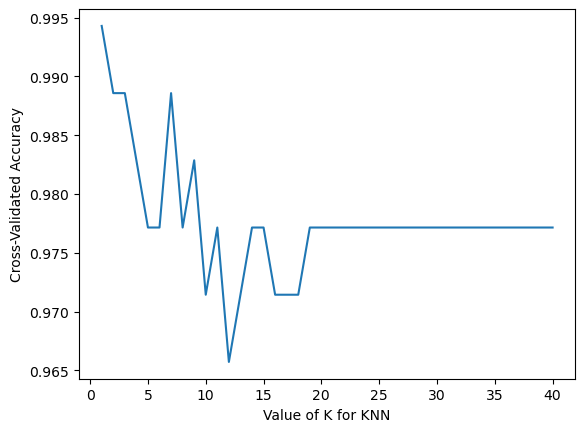

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train)
knn_test_f1 = f1_score(y_test, y_pred_test)

knn_train_prec = precision_score(y_train, y_pred_train)
knn_test_prec = precision_score(y_test, y_pred_test)

knn_train_roc = roc_auc_score(y_train, y_pred_train)
knn_test_roc = roc_auc_score(y_test, y_pred_test)

knn_train_cm = confusion_matrix(y_train, y_pred_train)
knn_test_cm = confusion_matrix(y_test, y_pred_test)

print('KNN training accuracy is', knn_train_acc)
print('KNN testing accuracy is', knn_test_acc)
print('--------------------------------------------------------')
print('KNN training F1 Score is', knn_train_f1)
print('KNN testing F1 Score is', knn_test_f1)
print('--------------------------------------------------------')
print('KNN training Precision is', knn_train_prec)
print('KNN testing Precision is', knn_test_prec)
print('--------------------------------------------------------')
print('KNN training ROC-AUC Score is', knn_train_roc)
print('KNN testing ROC-AUC Score is', knn_test_roc)
print('--------------------------------------------------------')
print('KNN training Confusion Matrix is')
print(knn_train_cm)
print('--------------------------------------------------------')
print('KNN testing Confusion Matrix is')
print(knn_test_cm)

KNN training accuracy is 1.0
KNN testing accuracy is 1.0
--------------------------------------------------------
KNN training F1 Score is 1.0
KNN testing F1 Score is 1.0
--------------------------------------------------------
KNN training Precision is 1.0
KNN testing Precision is 1.0
--------------------------------------------------------
KNN training ROC-AUC Score is 1.0
KNN testing ROC-AUC Score is 1.0
--------------------------------------------------------
KNN training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
KNN testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(max_depth=5)
rnd.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [28]:
y_pred_train = rnd.predict(x_train)
y_pred_test = rnd.predict(x_test)

rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train)
rnd_test_f1 = f1_score(y_test, y_pred_test)

rnd_train_prec = precision_score(y_train, y_pred_train)
rnd_test_prec = precision_score(y_test, y_pred_test)

rnd_train_roc = roc_auc_score(y_train, y_pred_train)
rnd_test_roc = roc_auc_score(y_test, y_pred_test)

rnd_train_cm = confusion_matrix(y_train, y_pred_train)
rnd_test_cm = confusion_matrix(y_test, y_pred_test)

print('Random Forest training accuracy is', rnd_train_acc)
print('Random Forest testing accuracy is', rnd_test_acc)
print('--------------------------------------------------------')
print('Random Forest training F1 Score is', rnd_train_f1)
print('Random Forest testing F1 Score is', rnd_test_f1)
print('--------------------------------------------------------')
print('Random Forest training Precision is', rnd_train_prec)
print('Random Forest testing Precision is', rnd_test_prec)
print('--------------------------------------------------------')
print('Random Forest training ROC-AUC Score is', rnd_train_roc)
print('Random Forest testing ROC-AUC Score is', rnd_test_roc)
print('--------------------------------------------------------')
print('Random Forest training Confusion Matrix is')
print(rnd_train_cm)
print('--------------------------------------------------------')
print('Random Forest testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest training accuracy is 1.0
Random Forest testing accuracy is 1.0
--------------------------------------------------------
Random Forest training F1 Score is 1.0
Random Forest testing F1 Score is 1.0
--------------------------------------------------------
Random Forest training Precision is 1.0
Random Forest testing Precision is 1.0
--------------------------------------------------------
Random Forest training ROC-AUC Score is 1.0
Random Forest testing ROC-AUC Score is 1.0
--------------------------------------------------------
Random Forest training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Random Forest testing Confusion Matrix is
[[25  0]
 [ 0 50]]


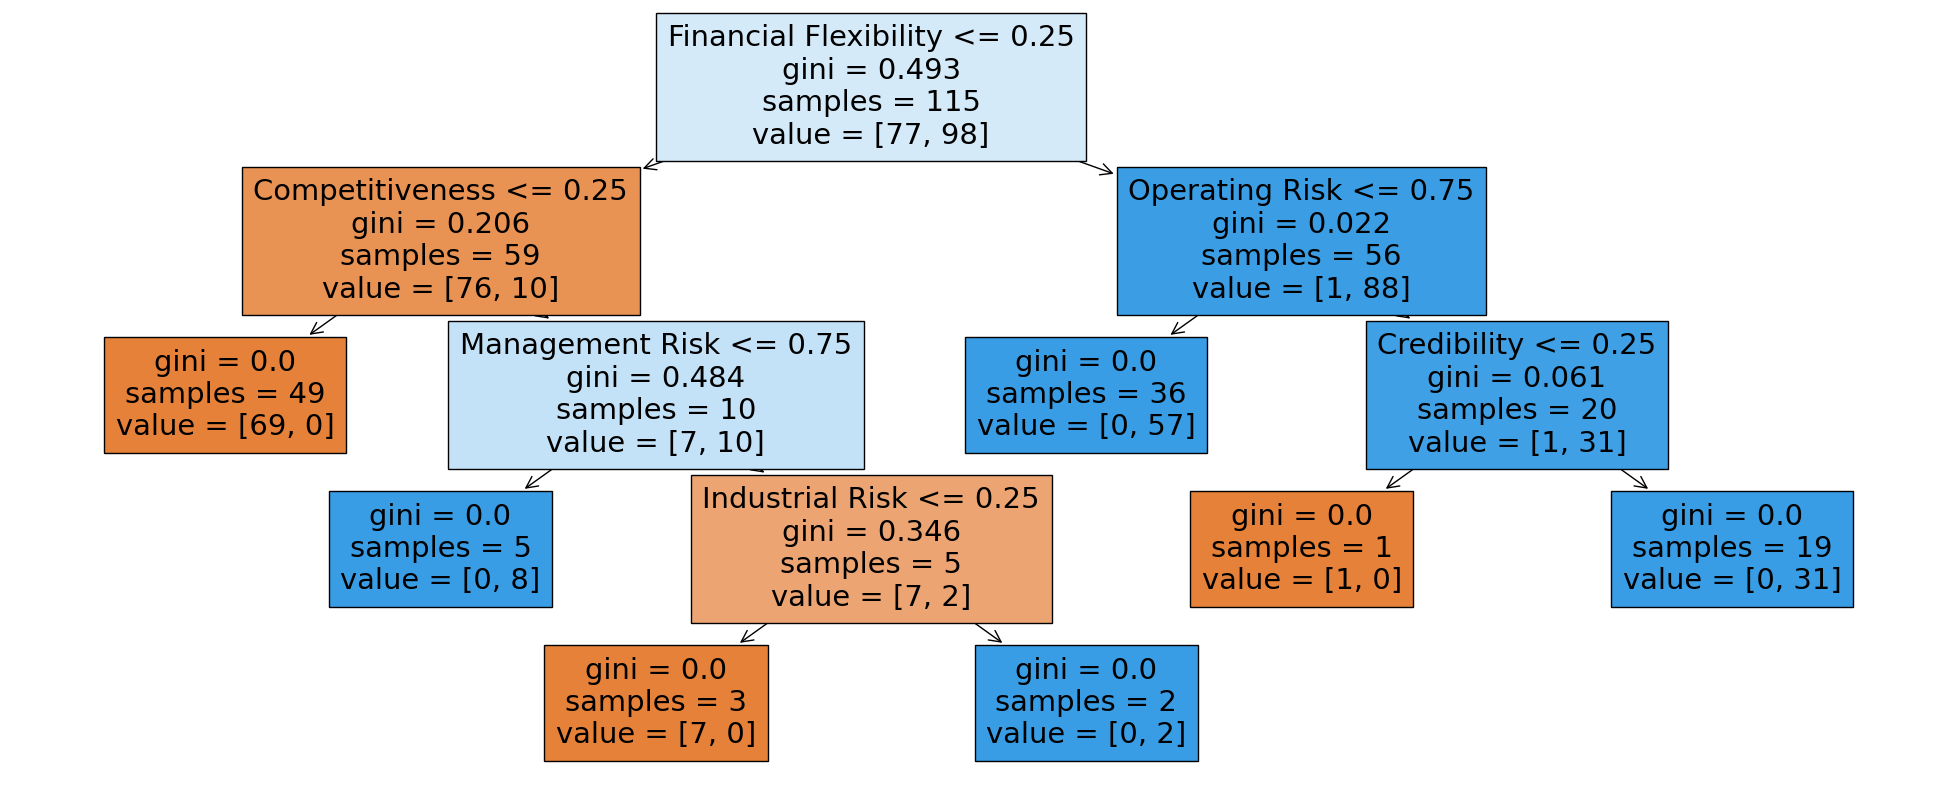

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(rnd.estimators_[9], feature_names= list(x),filled=True, max_depth=5)

## Bagging Classifier

In [30]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [31]:
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)

bag_train_f1 = f1_score(y_train, y_pred_train)
bag_test_f1 = f1_score(y_test, y_pred_test)

bag_train_prec = precision_score(y_train, y_pred_train)
bag_test_prec = precision_score(y_test, y_pred_test)

bag_train_roc = roc_auc_score(y_train, y_pred_train)
bag_test_roc = roc_auc_score(y_test, y_pred_test)

bag_train_cm = confusion_matrix(y_train, y_pred_train)
bag_test_cm = confusion_matrix(y_test, y_pred_test)

print('Bagging training accuracy is', bag_train_acc)
print('Bagging testing accuracy is', bag_test_acc)
print('--------------------------------------------------------')
print('Bagging training F1 Score is', bag_train_f1)
print('Bagging testing F1 Score is', bag_test_f1)
print('--------------------------------------------------------')
print('Bagging training Precision is', bag_train_prec)
print('Bagging testing Precision is', bag_test_prec)
print('--------------------------------------------------------')
print('Bagging training ROC-AUC Score is', bag_train_roc)
print('Bagging testing ROC-AUC Score is', bag_test_roc)
print('--------------------------------------------------------')
print('Bagging training Confusion Matrix is')
print(bag_train_cm)
print('--------------------------------------------------------')
print('Bagging testing Confusion Matrix is')
print(bag_test_cm)

Bagging training accuracy is 1.0
Bagging testing accuracy is 1.0
--------------------------------------------------------
Bagging training F1 Score is 1.0
Bagging testing F1 Score is 1.0
--------------------------------------------------------
Bagging training Precision is 1.0
Bagging testing Precision is 1.0
--------------------------------------------------------
Bagging training ROC-AUC Score is 1.0
Bagging testing ROC-AUC Score is 1.0
--------------------------------------------------------
Bagging training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Bagging testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## AdaBoost
This is another ensemble technique that assigns the weights to the parameters depending the errors. Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration. This will help it reach the convergence much faster.

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [33]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train)
ada_test_f1 = f1_score(y_test, y_pred_test)

ada_train_prec = precision_score(y_train, y_pred_train)
ada_test_prec = precision_score(y_test, y_pred_test)

ada_train_roc = roc_auc_score(y_train, y_pred_train)
ada_test_roc = roc_auc_score(y_test, y_pred_test)

ada_train_cm = confusion_matrix(y_train, y_pred_train)
ada_test_cm = confusion_matrix(y_test, y_pred_test)

print('AdaBoost training accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print('--------------------------------------------------------')
print('AdaBoost training F1 Score is', ada_train_f1)
print('AdaBoost testing F1 Score is', ada_test_f1)
print('--------------------------------------------------------')
print('AdaBoost training Precision is', ada_train_prec)
print('AdaBoost testing Precision is', ada_test_prec)
print('--------------------------------------------------------')
print('AdaBoost training ROC-AUC Score is', ada_train_roc)
print('AdaBoost testing ROC-AUC Score is', ada_test_roc)
print('--------------------------------------------------------')
print('AdaBoost training Confusion Matrix is')
print(ada_train_cm)
print('--------------------------------------------------------')
print('AdaBoost testing Confusion Matrix is')
print(ada_test_cm)

AdaBoost training accuracy is 1.0
AdaBoost testing accuracy is 1.0
--------------------------------------------------------
AdaBoost training F1 Score is 1.0
AdaBoost testing F1 Score is 1.0
--------------------------------------------------------
AdaBoost training Precision is 1.0
AdaBoost testing Precision is 1.0
--------------------------------------------------------
AdaBoost training ROC-AUC Score is 1.0
AdaBoost testing ROC-AUC Score is 1.0
--------------------------------------------------------
AdaBoost training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
AdaBoost testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## Gradient Boosting Classifier
This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(learning_rate=0.01)
grad.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [35]:
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train)
grad_test_f1 = f1_score(y_test, y_pred_test)

grad_train_prec = precision_score(y_train, y_pred_train)
grad_test_prec = precision_score(y_test, y_pred_test)

grad_train_roc = roc_auc_score(y_train, y_pred_train)
grad_test_roc = roc_auc_score(y_test, y_pred_test)

grad_train_cm = confusion_matrix(y_train, y_pred_train)
grad_test_cm = confusion_matrix(y_test, y_pred_test)

print('Gradient Boost training accuracy is', grad_train_acc)
print('Gradient Boost testing accuracy is', grad_test_acc)
print('--------------------------------------------------------')
print('Gradient Boost training F1 Score is', grad_train_f1)
print('Gradient Boost testing F1 Score is', grad_test_f1)
print('--------------------------------------------------------')
print('Gradient Boost training Precision is', grad_train_prec)
print('Gradient Boost testing Precision is', grad_test_prec)
print('--------------------------------------------------------')
print('Gradient Boost training ROC-AUC Score is', grad_train_roc)
print('Gradient Boost testing ROC-AUC Score is', grad_test_roc)
print('--------------------------------------------------------')
print('Gradient Boost training Confusion Matrix is')
print(grad_train_cm)
print('--------------------------------------------------------')
print('Gradient Boost testing Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training accuracy is 1.0
Gradient Boost testing accuracy is 0.9866666666666667
--------------------------------------------------------
Gradient Boost training F1 Score is 1.0
Gradient Boost testing F1 Score is 0.98989898989899
--------------------------------------------------------
Gradient Boost training Precision is 1.0
Gradient Boost testing Precision is 1.0
--------------------------------------------------------
Gradient Boost training ROC-AUC Score is 1.0
Gradient Boost testing ROC-AUC Score is 0.99
--------------------------------------------------------
Gradient Boost training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Gradient Boost testing Confusion Matrix is
[[25  0]
 [ 1 49]]


## SVR
This model uses the support vector concept. There are 3 kernels which are linear, polynomial, and rbf.

### Linear Kernel

In [36]:
from sklearn.svm import SVC

svcl = SVC(kernel= "linear") 
svcl.fit(x_train , y_train) 

SVC(kernel='linear')

In [37]:
y_pred_train = svcl.predict(x_train)
y_pred_test = svcl.predict(x_test)

svcl_train_acc = accuracy_score(y_train, y_pred_train)
svcl_test_acc = accuracy_score(y_test, y_pred_test)

svcl_train_f1 = f1_score(y_train, y_pred_train)
svcl_test_f1 = f1_score(y_test, y_pred_test)

svcl_train_prec = precision_score(y_train, y_pred_train)
svcl_test_prec = precision_score(y_test, y_pred_test)

svcl_train_roc = roc_auc_score(y_train, y_pred_train)
svcl_test_roc = roc_auc_score(y_test, y_pred_test)

svcl_train_cm = confusion_matrix(y_train, y_pred_train)
svcl_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC Linear Kernel training accuracy is', svcl_train_acc)
print('SVC Linear Kernel testing accuracy is', svcl_test_acc)
print('--------------------------------------------------------')
print('SVC Linear Kernel training F1 Score is', svcl_train_f1)
print('SVC Linear Kernel testing F1 Score is', svcl_test_f1)
print('--------------------------------------------------------')
print('SVC Linear Kernel training Precision is', svcl_train_prec)
print('SVC Linear Kernel testing Precision is', svcl_test_prec)
print('--------------------------------------------------------')
print('SVC Linear Kernel training ROC-AUC Score is', svcl_train_roc)
print('SVC Linear Kernel testing ROC-AUC Score is', svcl_test_roc)
print('--------------------------------------------------------')
print('SVC Linear Kernel training Confusion Matrix is')
print(svcl_train_cm)
print('--------------------------------------------------------')
print('SVC Linear Kernel testing Confusion Matrix is')
print(svcl_test_cm)

SVC Linear Kernel training accuracy is 0.9942857142857143
SVC Linear Kernel testing accuracy is 0.9866666666666667
--------------------------------------------------------
SVC Linear Kernel training F1 Score is 0.9946524064171123
SVC Linear Kernel testing F1 Score is 0.98989898989899
--------------------------------------------------------
SVC Linear Kernel training Precision is 0.9893617021276596
SVC Linear Kernel testing Precision is 1.0
--------------------------------------------------------
SVC Linear Kernel training ROC-AUC Score is 0.9939024390243902
SVC Linear Kernel testing ROC-AUC Score is 0.99
--------------------------------------------------------
SVC Linear Kernel training Confusion Matrix is
[[81  1]
 [ 0 93]]
--------------------------------------------------------
SVC Linear Kernel testing Confusion Matrix is
[[25  0]
 [ 1 49]]


### Polynomial Kernel

In [38]:
svcp = SVC(kernel= "poly") 
svcp.fit(x_train , y_train) 

SVC(kernel='poly')

In [39]:
y_pred_train = svcp.predict(x_train)
y_pred_test = svcp.predict(x_test)

svcp_train_acc = accuracy_score(y_train, y_pred_train)
svcp_test_acc = accuracy_score(y_test, y_pred_test)

svcp_train_f1 = f1_score(y_train, y_pred_train)
svcp_test_f1 = f1_score(y_test, y_pred_test)

svcp_train_prec = precision_score(y_train, y_pred_train)
svcp_test_prec = precision_score(y_test, y_pred_test)

svcp_train_roc = roc_auc_score(y_train, y_pred_train)
svcp_test_roc = roc_auc_score(y_test, y_pred_test)

svcp_train_cm = confusion_matrix(y_train, y_pred_train)
svcp_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC Polynomial Kernel training accuracy is', svcp_train_acc)
print('SVC Polynomial Kernel testing accuracy is', svcp_test_acc)
print('--------------------------------------------------------')
print('SVC Polynomial Kernel training F1 Score is', svcp_train_f1)
print('SVC Polynomial Kernel testing F1 Score is', svcp_test_f1)
print('--------------------------------------------------------')
print('SVC Polynomial Kernel training Precision is', svcp_train_prec)
print('SVC Polynomial Kernel testing Precision is', svcp_test_prec)
print('--------------------------------------------------------')
print('SVC Polynomial Kernel training ROC-AUC Score is', svcp_train_roc)
print('SVC Polynomial Kernel testing ROC-AUC Score is', svcp_test_roc)
print('--------------------------------------------------------')
print('SVC Polynomial Kernel training Confusion Matrix is')
print(svcp_train_cm)
print('--------------------------------------------------------')
print('SVC Polynomial Kernel testing Confusion Matrix is')
print(svcp_test_cm)

SVC Polynomial Kernel training accuracy is 1.0
SVC Polynomial Kernel testing accuracy is 0.9866666666666667
--------------------------------------------------------
SVC Polynomial Kernel training F1 Score is 1.0
SVC Polynomial Kernel testing F1 Score is 0.98989898989899
--------------------------------------------------------
SVC Polynomial Kernel training Precision is 1.0
SVC Polynomial Kernel testing Precision is 1.0
--------------------------------------------------------
SVC Polynomial Kernel training ROC-AUC Score is 1.0
SVC Polynomial Kernel testing ROC-AUC Score is 0.99
--------------------------------------------------------
SVC Polynomial Kernel training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
SVC Polynomial Kernel testing Confusion Matrix is
[[25  0]
 [ 1 49]]


### RBF Kernel

In [40]:
svcr = SVC(C= 20, gamma = 50) 
svcr.fit(x_train , y_train) 

SVC(C=20, gamma=50)

In [41]:
y_pred_train = svcr.predict(x_train)
y_pred_test = svcr.predict(x_test)

svcr_train_acc = accuracy_score(y_train, y_pred_train)
svcr_test_acc = accuracy_score(y_test, y_pred_test)

svcr_train_f1 = f1_score(y_train, y_pred_train)
svcr_test_f1 = f1_score(y_test, y_pred_test)

svcr_train_prec = precision_score(y_train, y_pred_train)
svcr_test_prec = precision_score(y_test, y_pred_test)

svcr_train_roc = roc_auc_score(y_train, y_pred_train)
svcr_test_roc = roc_auc_score(y_test, y_pred_test)

svcr_train_cm = confusion_matrix(y_train, y_pred_train)
svcr_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC RBF Kernel training accuracy is', svcr_train_acc)
print('SVC RBF Kernel testing accuracy is', svcr_test_acc)
print('--------------------------------------------------------')
print('SVC RBF Kernel training F1 Score is', svcr_train_f1)
print('SVC RBF Kernel testing F1 Score is', svcr_test_f1)
print('--------------------------------------------------------')
print('SVC RBF Kernel training Precision is', svcr_train_prec)
print('SVC RBF Kernel testing Precision is', svcr_test_prec)
print('--------------------------------------------------------')
print('SVC RBF Kernel training ROC-AUC Score is', svcr_train_roc)
print('SVC RBF Kernel testing ROC-AUC Score is', svcr_test_roc)
print('--------------------------------------------------------')
print('SVC RBF Kernel training Confusion Matrix is')
print(svcr_train_cm)
print('--------------------------------------------------------')
print('SVC RBF Kernel testing Confusion Matrix is')
print(svcr_test_cm)

SVC RBF Kernel training accuracy is 1.0
SVC RBF Kernel testing accuracy is 1.0
--------------------------------------------------------
SVC RBF Kernel training F1 Score is 1.0
SVC RBF Kernel testing F1 Score is 1.0
--------------------------------------------------------
SVC RBF Kernel training Precision is 1.0
SVC RBF Kernel testing Precision is 1.0
--------------------------------------------------------
SVC RBF Kernel training ROC-AUC Score is 1.0
SVC RBF Kernel testing ROC-AUC Score is 1.0
--------------------------------------------------------
SVC RBF Kernel training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
SVC RBF Kernel testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## Stacking
In this technique different types of estimators or even ensembles can be used stacked upon each other to get the results.

Here the logistic regressor, decision tree classifier, and the gradient boosting classifier are stacked together.

In [42]:
from sklearn.ensemble import StackingClassifier

estimators = [('log', LogisticRegression(max_iter=500)), ('rnd', RandomForestClassifier(max_depth=5)), ('svcr', SVC(C= 20, gamma = 50))]
stack = StackingClassifier(estimators=estimators)
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('log', LogisticRegression(max_iter=500)),
                               ('rnd', RandomForestClassifier(max_depth=5)),
                               ('svcr', SVC(C=20, gamma=50))])

In [43]:
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

stack_train_acc = accuracy_score(y_train, y_pred_train)
stack_test_acc = accuracy_score(y_test, y_pred_test)

stack_train_f1 = f1_score(y_train, y_pred_train)
stack_test_f1 = f1_score(y_test, y_pred_test)

stack_train_prec = precision_score(y_train, y_pred_train)
stack_test_prec = precision_score(y_test, y_pred_test)

stack_train_roc = roc_auc_score(y_train, y_pred_train)
stack_test_roc = roc_auc_score(y_test, y_pred_test)

stack_train_cm = confusion_matrix(y_train, y_pred_train)
stack_test_cm = confusion_matrix(y_test, y_pred_test)

print('Stacking training accuracy is', stack_train_acc)
print('Stacking testing accuracy is', stack_test_acc)
print('--------------------------------------------------------')
print('Stacking training F1 Score is', stack_train_f1)
print('Stacking testing F1 Score is', stack_test_f1)
print('--------------------------------------------------------')
print('Stacking training Precision is', stack_train_prec)
print('Stacking testing Precision is', stack_test_prec)
print('--------------------------------------------------------')
print('Stacking training ROC-AUC Score is', stack_train_roc)
print('Stacking testing ROC-AUC Score is', stack_test_roc)
print('--------------------------------------------------------')
print('Stacking training Confusion Matrix is')
print(stack_train_cm)
print('--------------------------------------------------------')
print('Stacking testing Confusion Matrix is')
print(stack_test_cm)

Stacking training accuracy is 1.0
Stacking testing accuracy is 1.0
--------------------------------------------------------
Stacking training F1 Score is 1.0
Stacking testing F1 Score is 1.0
--------------------------------------------------------
Stacking training Precision is 1.0
Stacking testing Precision is 1.0
--------------------------------------------------------
Stacking training ROC-AUC Score is 1.0
Stacking testing ROC-AUC Score is 1.0
--------------------------------------------------------
Stacking training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Stacking testing Confusion Matrix is
[[25  0]
 [ 0 50]]


## Artificial Neural Networks

In [44]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 6,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

ann = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

ann.fit(x_train, y_train)

y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

ann_train_acc = accuracy_score(y_train, y_pred_train)
ann_test_acc = accuracy_score(y_test, y_pred_test)

ann_train_f1 = f1_score(y_train, y_pred_train)
ann_test_f1 = f1_score(y_test, y_pred_test)

ann_train_prec = precision_score(y_train, y_pred_train)
ann_test_prec = precision_score(y_test, y_pred_test)

ann_train_roc = roc_auc_score(y_train, y_pred_train)
ann_test_roc = roc_auc_score(y_test, y_pred_test)

ann_train_cm = confusion_matrix(y_train, y_pred_train)
ann_test_cm = confusion_matrix(y_test, y_pred_test)

print('Artificial Neural Network training accuracy is', ann_train_acc)
print('Artificial Neural Network testing accuracy is', ann_test_acc)
print('--------------------------------------------------------')
print('Artificial Neural Network training F1 Score is', ann_train_f1)
print('Artificial Neural Network testing F1 Score is', ann_test_f1)
print('--------------------------------------------------------')
print('Artificial Neural Network training Precision is', ann_train_prec)
print('Artificial Neural Network testing Precision is', ann_test_prec)
print('--------------------------------------------------------')
print('Artificial Neural Network training ROC-AUC Score is', ann_train_roc)
print('Artificial Neural Network testing ROC-AUC Score is', ann_test_roc)
print('--------------------------------------------------------')
print('Artificial Neural Network training Confusion Matrix is')
print(ann_train_cm)
print('--------------------------------------------------------')
print('Artificial Neural Network testing Confusion Matrix is')
print(ann_test_cm)

3/3 [==============================] - 0s 3ms/step
Artificial Neural Network training accuracy is 1.0
Artificial Neural Network testing accuracy is 0.9866666666666667
--------------------------------------------------------
Artificial Neural Network training F1 Score is 1.0
Artificial Neural Network testing F1 Score is 0.98989898989899
--------------------------------------------------------
Artificial Neural Network training Precision is 1.0
Artificial Neural Network testing Precision is 1.0
--------------------------------------------------------
Artificial Neural Network training ROC-AUC Score is 1.0
Artificial Neural Network testing ROC-AUC Score is 0.99
--------------------------------------------------------
Artificial Neural Network training Confusion Matrix is
[[82  0]
 [ 0 93]]
--------------------------------------------------------
Artificial Neural Network testing Confusion Matrix is
[[25  0]
 [ 1 49]]


In [45]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC Linear Kernel', 'SVC Polynomial Kernel', 'SVC RBF Kernel', 'Stacking', 'Neural Networks'],
    'Training Accuracy': [log_train_acc, dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc, ada_train_acc, grad_train_acc, svcl_train_acc, svcp_train_acc, svcr_train_acc, stack_train_acc, ann_train_acc],
    'Testing Accuracy': [log_test_acc, dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc, ada_test_acc, grad_test_acc, svcl_test_acc, svcp_test_acc, svcr_test_acc, stack_test_acc, ann_test_acc],
    'Training F1 Score': [log_train_f1, dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1, ada_train_f1, grad_train_f1, svcl_train_f1, svcp_train_f1, svcr_train_f1, stack_train_f1, ann_train_f1],
    'Testing F1 Score': [log_test_f1, dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1, ada_test_f1, grad_test_f1, svcl_test_f1, svcp_test_f1, svcr_test_f1, stack_test_f1, ann_test_f1],
    'Training Precision': [log_train_prec, dec_train_prec, knn_train_prec, rnd_train_prec, bag_train_prec, ada_train_prec, grad_train_prec, svcl_train_prec, svcp_train_prec, svcr_train_prec, stack_train_prec, ann_train_prec],
    'Testing Precision': [log_test_prec, dec_test_prec, knn_test_prec, rnd_test_prec, bag_test_prec, ada_test_prec, grad_test_prec, svcl_test_prec, svcp_test_prec, svcr_test_prec, stack_test_prec, ann_test_prec],
    'Training ROC-AUC Score': [log_train_roc, dec_train_roc, knn_train_roc, rnd_train_roc, bag_train_roc, ada_train_roc, grad_train_roc, svcl_train_roc, svcp_train_roc, svcr_train_roc, stack_train_roc, ann_train_roc],
    'Testing ROC-AUC Score': [log_test_roc, dec_test_roc, knn_test_roc, rnd_test_roc, bag_test_roc, ada_test_roc, grad_test_roc, svcl_test_roc, svcp_test_roc, svcr_test_roc, stack_test_roc, ann_test_roc]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
0,Logistic Regression,0.994286,1.000000,0.994652,1.000000,0.989362,1.0,0.993902,1.00
1,Decision Tree,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
2,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
6,Gradient Boost,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
7,SVC Linear Kernel,0.994286,0.986667,0.994652,0.989899,0.989362,1.0,0.993902,0.99
8,SVC Polynomial Kernel,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
9,SVC RBF Kernel,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00


In [46]:
results_df.sort_values(by=['Training F1 Score', 'Testing F1 Score'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
2,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
9,SVC RBF Kernel,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
10,Stacking,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00
1,Decision Tree,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
6,Gradient Boost,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
8,SVC Polynomial Kernel,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99
11,Neural Networks,1.000000,0.986667,1.000000,0.989899,1.000000,1.0,1.000000,0.99


--------------------------

From the results table it is clear that the **KNN, Random Forest, Bagging, AdaBoost, SVC RBF Kernel, Stacking and the Neural Network classifiers** has the highest F1 Score of 100%.